# Data Management Algorithm for Decision Making in Clash Royale
**Analyzing User Behavior in Clash Royale for Strategic Decision Making**

## Project Rationale
This project aims to leverage advanced data management algorithms to analyze user behavior in the popular mobile game Clash Royale.<br>
By utilizing datasets obtained from Kaggle, we will explore how different user behaviors impact game outcomes.<br>
The goal is to apply techniques learned in the course to understand which behaviors lead to winning, prolonged gameplay, and frequent app usage.

we will focuses on handling various steps in the data-driven decision-making process, including data integration, cleaning, and exploration.<br>
In this project we will address common data issues such as missing data, dirty or inconsistent data, and bias, ensuring trustworthy decision-making.

## Data Description
We will use the following datasets:
1. **BattlesStaging_01012021_WL_tagged.csv**: Contains data on games played on January 1, 2021. each row present 1 game between 2 players.
2. **Wincons.csv**: Contains information about impactful cards in the game.
3. **clash_royal_data.csv**: Contains specific card data, including ratings and usage statistics.

### Columns in BattlesStaging_01012021_WL_tagged.csv
- `Unnamed: 0`: Index
- `battleTime`: The time the battle started
- `arena.id`: The ID of the arena where the battle took place
- `gameMode.id`: The ID of the game mode
- `average.startingTrophies`: The average starting trophies of both players
- `winner.tag`: The tag of the winning player
- `winner.startingTrophies`: The starting trophies of the winning player
- `winner.trophyChange`: The change in trophies for the winning player
- `winner.crowns`: The number of crowns earned by the winning player
- `winner.kingTowerHitPoints`: The hit points of the winning player's king tower
- `winner.princessTowersHitPoints`: The hit points of the winning player's princess towers
- `winner.clan.tag`: The clan tag of the winning player
- `winner.clan.badgeId`: The clan badge ID of the winning player
- `loser.tag`: The tag of the losing player
- `loser.startingTrophies`: The starting trophies of the losing player
- `loser.trophyChange`: The change in trophies for the losing player
- `loser.crowns`: The number of crowns earned by the losing player
- `loser.kingTowerHitPoints`: The hit points of the losing player's king tower
- `loser.clan.tag`: The clan tag of the losing player
- `loser.clan.badgeId`: The clan badge ID of the losing player
- `loser.princessTowersHitPoints`: The hit points of the losing player's princess towers
- `tournamentTag`: The tag of the tournament (if applicable)
- `winner.card1.id` to `winner.card8.id`: The IDs of the winning player's cards
- `winner.card1.level` to `winner.card8.level`: The levels of the winning player's cards
- `winner.cards.list`: The list of cards of the winning player
- `winner.totalcard.level`: The total level of the cards of the winning player
- `winner.troop.count`: The count of troop cards of the winning player
- `winner.structure.count`: The count of structure cards of the winning player
- `winner.spell.count`: The count of spell cards of the winning player
- `winner.common.count`: The count of common cards of the winning player
- `winner.rare.count`: The count of rare cards of the winning player
- `winner.epic.count`: The count of epic cards of the winning player
- `winner.legendary.count`: The count of legendary cards of the winning player
- `winner.elixir.average`: The average elixir cost of the winning player's deck
- `loser.card1.id` to `loser.card8.id`: The IDs of the losing player's cards
- `loser.card1.level` to `loser.card8.level`: The levels of the losing player's cards
- `loser.cards.list`: The list of cards of the losing player
- `loser.totalcard.level`: The total level of the cards of the losing player
- `loser.troop.count`: The count of troop cards of the losing player
- `loser.structure.count`: The count of structure cards of the losing player
- `loser.spell.count`: The count of spell cards of the losing player
- `loser.common.count`: The count of common cards of the losing player
- `loser.rare.count`: The count of rare cards of the losing player
- `loser.epic.count`: The count of epic cards of the losing player
- `loser.legendary.count`: The count of legendary cards of the losing player
- `loser.elixir.average`: The average elixir cost of the losing player's deck

### Columns in Wincons.csv
- `id`: Index
- `card_id`: The ID of the card
- `card_name`: The name of the card

### Columns in clash_royal_data.csv
- `name`: The name of the card
- `Rating`: The rating of the card
- `Usage`: The usage percentage of the card
- `increase_in_usage`: The increase in usage percentage
- `Win`: The win percentage of the card
- `increase_in_win`: The increase in win percentage
- `CWR`: The card win rate


In [1]:
%reload_ext autoreload
%autoreload 2
# Import necessary libraries
import projcore as pc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.ensemble import IsolationForest
pd.set_option('display.max_columns', None)

## Data Integration, Cleaning, and Exploration
We will start by loading the datasets. We will then clean and explore the data to ensure it is ready for analysis.

In [2]:
pc.download_kaggle_datasets()
org_battles_df = pd.read_csv('BattlesStaging_01012021_WL_tagged.csv')
card_list_df = pd.read_csv('CardMasterListSeason18_12082020.csv')
winning_card_list_df = pd.read_csv('Wincons.csv')
battles_df = pc.feature_preprocessing(org_battles_df, winning_card_list_df)

File BattlesStaging_01012021_WL_tagged/BattlesStaging_01012021_WL_tagged.csv already exists, skipping download
File CardMasterListSeason18_12082020.csv already exists, skipping download
File Wincons.csv already exists, skipping download
clash-royal-data.csv already exists, skipping download


In [4]:
org_battles_df.head(20).to_csv('org_battles_df.csv', index=False)
battles_df.head(100).to_csv('battles_df100.csv', index=False)

battles_df["winner.win_lose_ratio"] = np.where(
    battles_df["winner.losing_count"] == 0,
    1.0,
    battles_df["winner.count"] / battles_df["winner.total_games_for"]
)

## Feature Engineering
We will create new features to enhance our analysis. This includes calculating the elixir variability, trophy efficiency, and other metrics that can help us understand the factors influencing game outcomes.

In the next section, we create new features to enhance our analysis. These features include:

- `battleTime`: Converted to datetime format for easier time-based analysis.  
- `deck_elixir_variability`: Standard deviation of elixir averages between the winner and loser, indicating how different their decks' elixir costs are.  
- `winner.trophy_eff`: The ratio of the winner's trophy change to their starting trophies, measuring the impact of the match on their ranking.  
- `loser.trophy_eff`: The absolute ratio of the loser's trophy change to their starting trophies, showing how much they lost relative to their ranking.  
- `winner.card_level_std`: Standard deviation of the winner's card levels, indicating how balanced their deck is in terms of card levels.  
- `loser.card_level_std`: Standard deviation of the loser's card levels, reflecting deck balance in terms of card levels.  
- `winner.spell_troop_ratio`: Ratio of the number of spells to troops in the winner's deck, adjusted to avoid division by zero.  
- `loser.spell_troop_ratio`: Ratio of the number of spells to troops in the loser's deck, adjusted to avoid division by zero.  
- `winner_loser.elixir_gap`: Difference between the winner's and loser's average elixir costs, indicating whether the winner had a more expensive or cheaper deck.  
- `winner.rarity_diversity`: Number of different card rarities in the winner's deck, showing how varied their deck composition is.  
- `loser.rarity_diversity`: Number of different card rarities in the loser's deck, reflecting deck variety.  
- `winner.princessTowersHitPoints`: Total hit points of the winner's Princess Towers, calculated from stored list data.  
- `loser.princessTowersHitPoints`: Total hit points of the loser's Princess Towers, computed similarly to the winner.  
- `winner_loser.princess_tower_gap`: Difference in Princess Tower hit points between the winner and loser, showing who had more tower health remaining.  
- `winner.has_legendary`: Binary flag (1 or 0) indicating whether the winner's deck contains at least one legendary card.  
- `loser.has_legendary`: Binary flag (1 or 0) indicating whether the loser's deck contains at least one legendary card.  
- `winner_loser.elixir_advantage`: Binary flag (1 or 0) indicating whether the winner had a higher average elixir cost than the loser.  
- `winner.balanced_deck`: Binary flag indicating whether the winner's deck contains a balanced mix of troops, spells, and structures.  
- `loser.balanced_deck`: Binary flag indicating whether the loser's deck is balanced in terms of troop, spell, and structure counts.  
- `winner.underleveled`: Binary flag indicating if the winner's total card level is below the average for their arena.  
- `loser.underleveled`: Binary flag indicating if the loser's total card level is below the average for their arena.  
- `winner.crown_dominance`: Binary flag indicating whether the winner achieved at least two crowns in the match.  
- `winner.count`: Total number of battles in which the winner appeared as a winner.  
- `winner.losing_count`: Total number of battles in which the winner appeared as a loser.  
- `winner.total_games_for`: Total number of battles the winner has participated in, summing both wins and losses.  
- `winner.win_lose_ratio`: Ratio of the winner's total wins to their total games played, defaulting to 1.0 if no losses.  
- `winner.win_lose_ratio_Z_score`: Z-score normalization of the winner's win-lose ratio to standardize across all players.  
- `winner.winning_card_count`: Number of cards in the winner's deck that are classified as "winning cards."  
- `loser.winning_card_count`: Number of cards in the loser's deck that are classified as "winning cards."  
- `winner.card_set`: Ordered tuple of the winner's deck card IDs, facilitating set-based analysis.  
- `loser.card_set`: Ordered tuple of the loser's deck card IDs, enabling comparisons between card sets.  
- `winner.avg_card_level`: Average level of all cards in the winner's deck.  
- `winner.max_card_level`: Maximum card level in the winner's deck.  
- `winner.min_card_level`: Minimum card level in the winner's deck.  
- `winner.level_variance`: Variance of the card levels in the winner's deck, indicating level consistency.  
- `winner.deck_weighted_strength`: Computed deck strength score for the winner, based on weighted win rates of individual cards.  
- `winner.synergy_score`: Normalized synergy score of the winner's deck, reflecting how well the cards complement each other.  
- `winner.deck_weighted_strength (normalized)`: Min-max normalized version of the winner's deck strength score for comparative analysis.  








These features help us understand the factors influencing game outcomes by providing more detailed metrics on player performance, deck composition, and game dynamics.

# YAGEL OR SALEH: GIVE GOOD NAME LIKE CASUAL INFERENCE OR SOMETHING LIKE THAT

## DAG Construction

in order to build our DAG, we will start with correlation : 

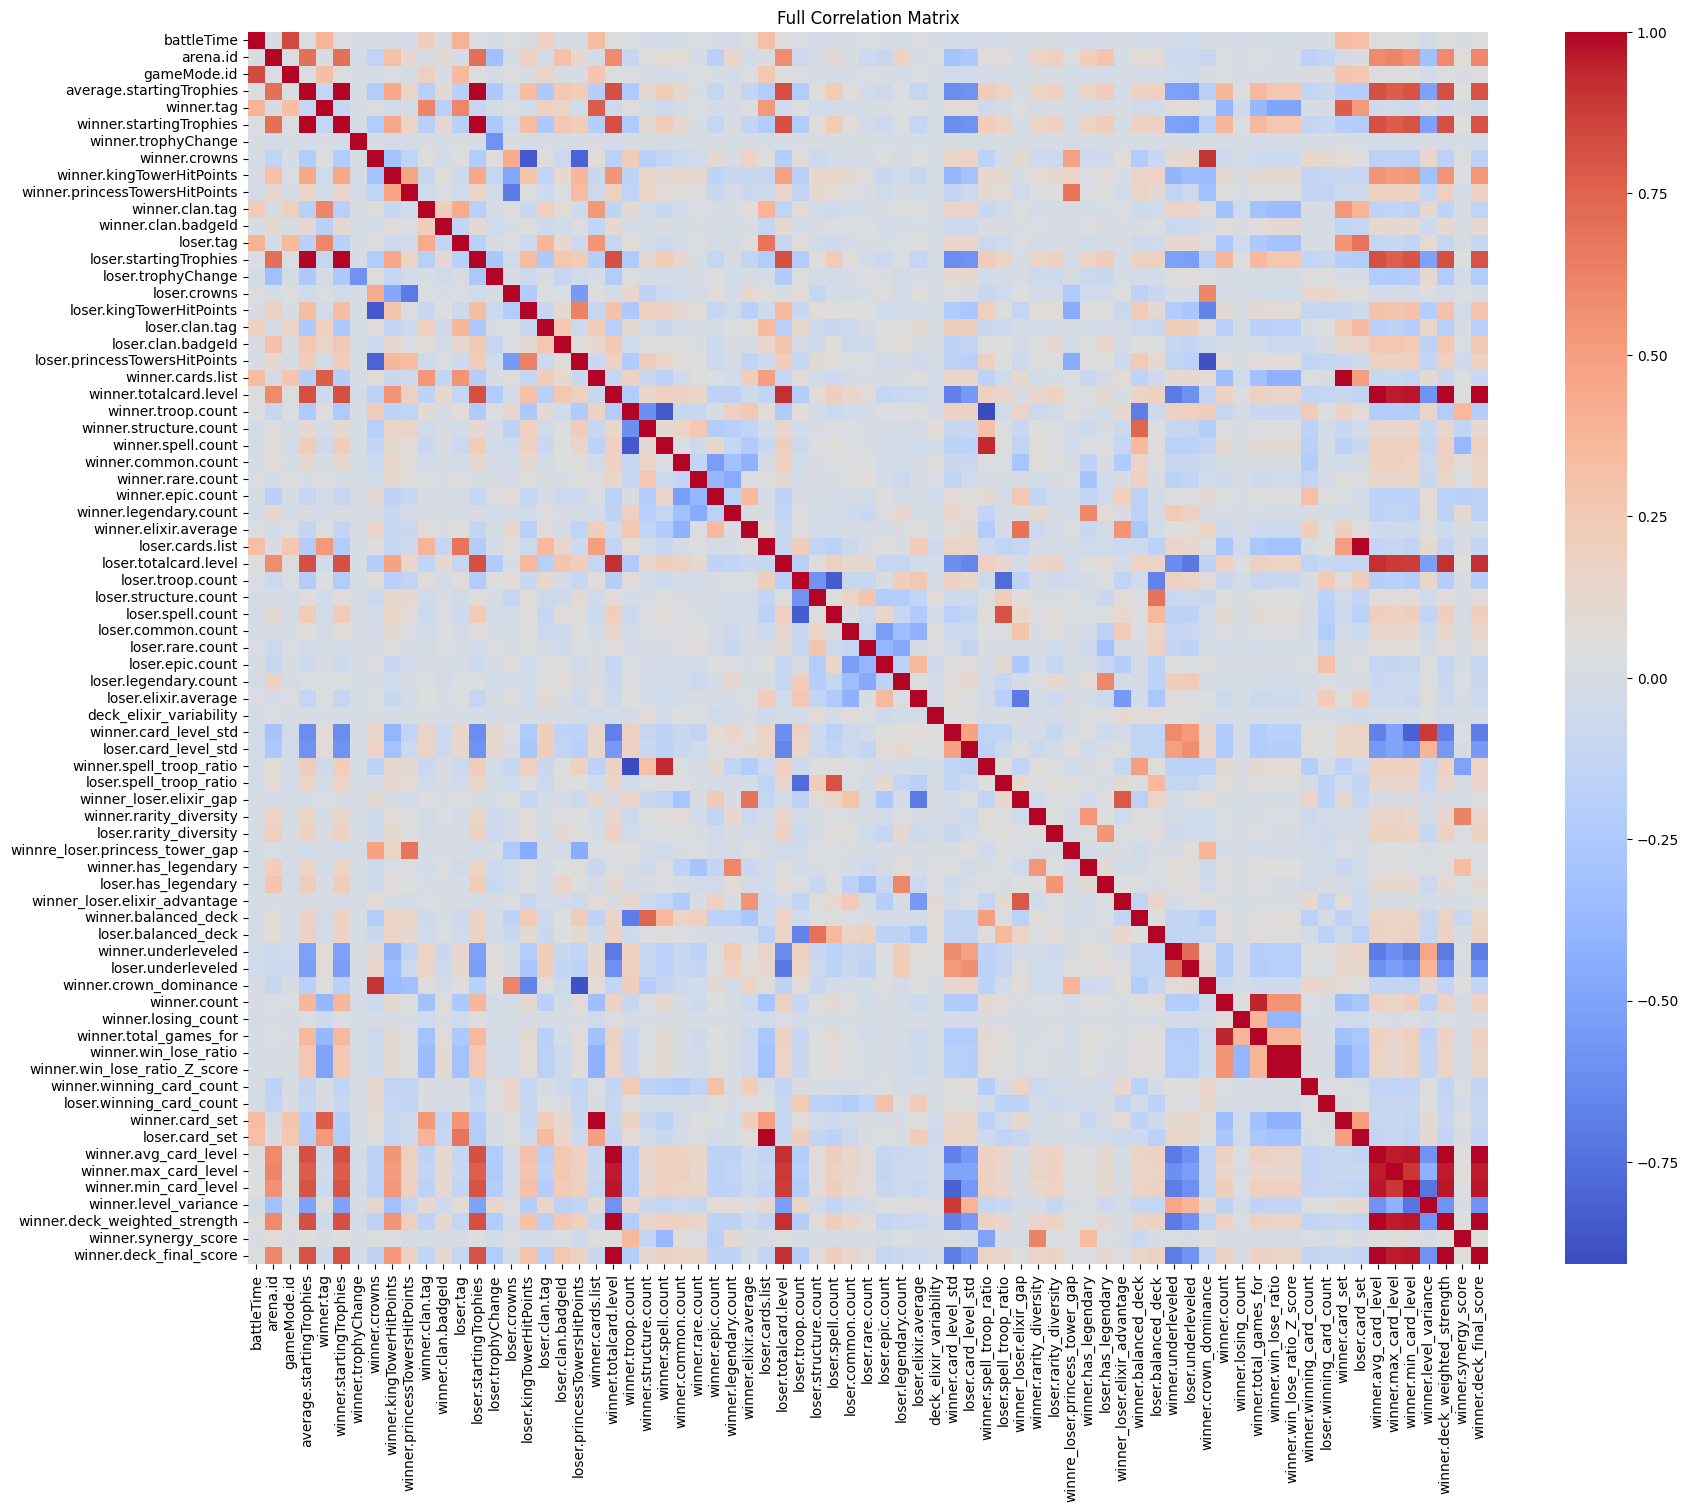

In [43]:
# Calculate the correlation matrix for the specified features
battles_df_for_dag = battles_df.copy()
battles_df_for_dag['loser.card_set'] = pd.factorize(battles_df_for_dag['loser.card_set'])[0]
battles_df_for_dag['winner.card_set'] = pd.factorize(battles_df_for_dag['winner.card_set'])[0]
battles_df_for_dag.drop('Unnamed: 0', axis=1, inplace=True)


battles_df_for_dag.drop(['loser.trophy_eff', 'winner.trophy_eff'], axis=1, inplace=True)
correlation_matrix = battles_df_for_dag.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Full Correlation Matrix')
plt.show()

now we will look at the feature-pairs that have more than 0.5 corr

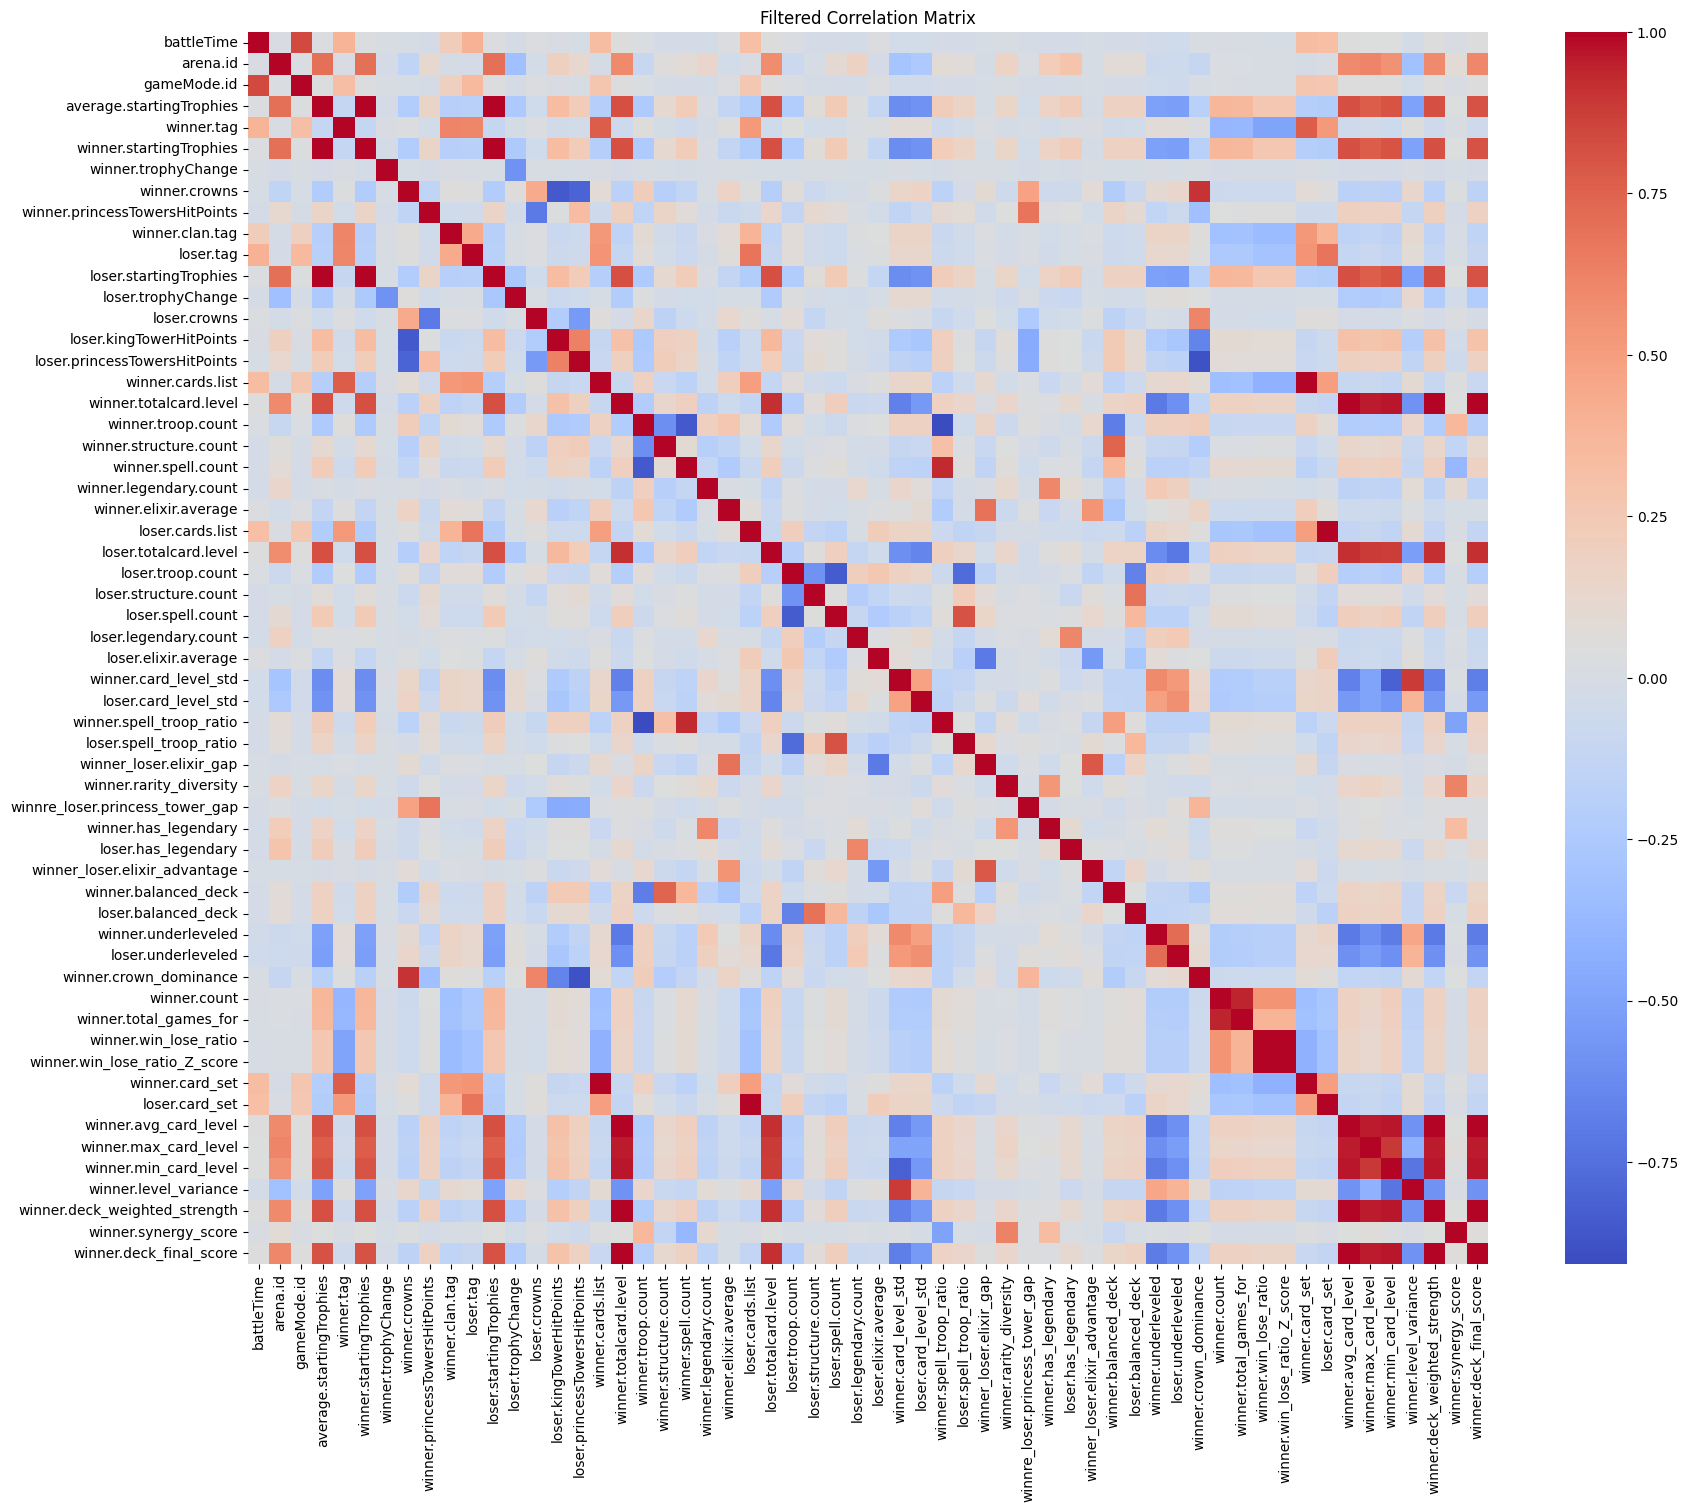

In [44]:
potential_features = set()
# Iterate over the correlation matrix and print tuples with correlation >= 0.55
for i in range(len(correlation_matrix.columns)):
	for j in range(i+1, len(correlation_matrix.columns)):
		if abs(correlation_matrix.iloc[i, j]) > 0.55:
			potential_features.add(correlation_matrix.columns[i])
			potential_features.add(correlation_matrix.columns[j])

for feature in battles_df_for_dag.columns:
	if feature not in potential_features:
		battles_df_for_dag.drop(feature, axis=1, inplace=True)


correlation_matrix = battles_df_for_dag.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Filtered Correlation Matrix')
plt.show()

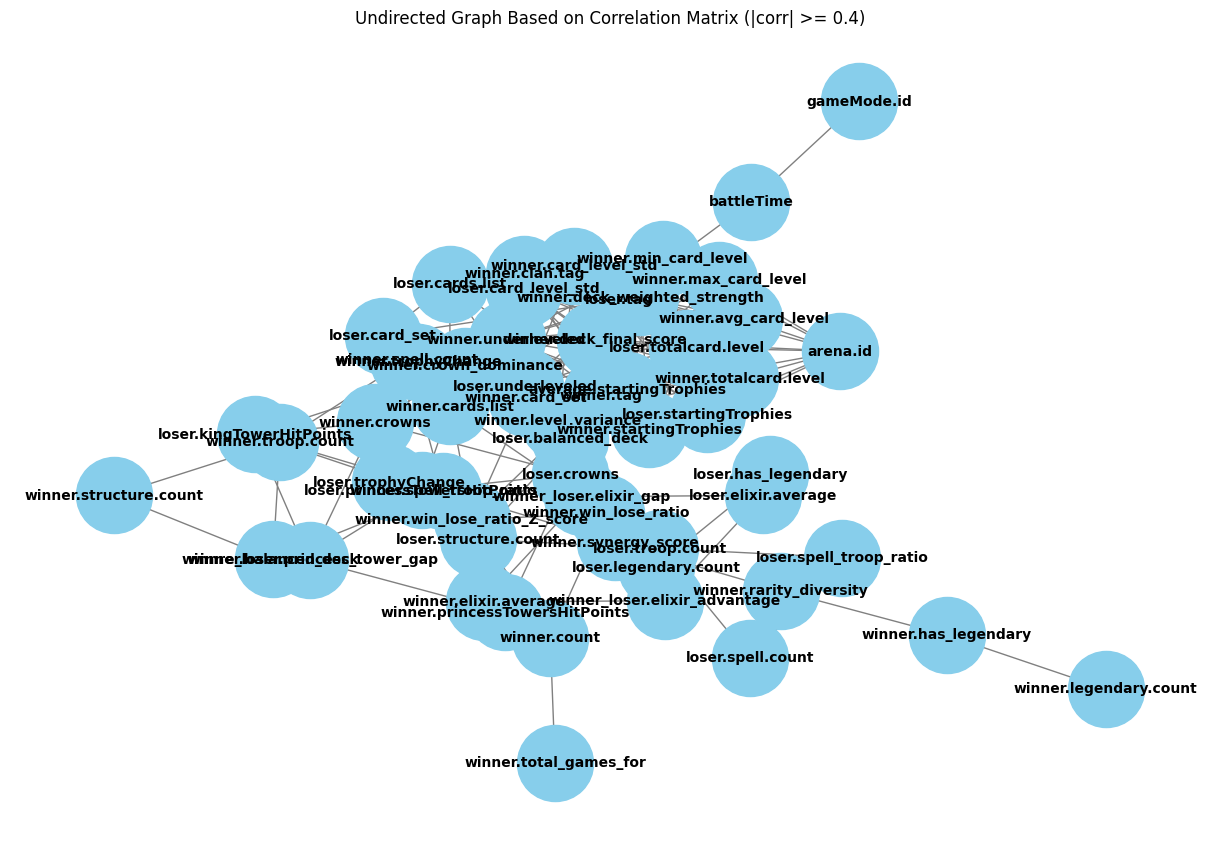

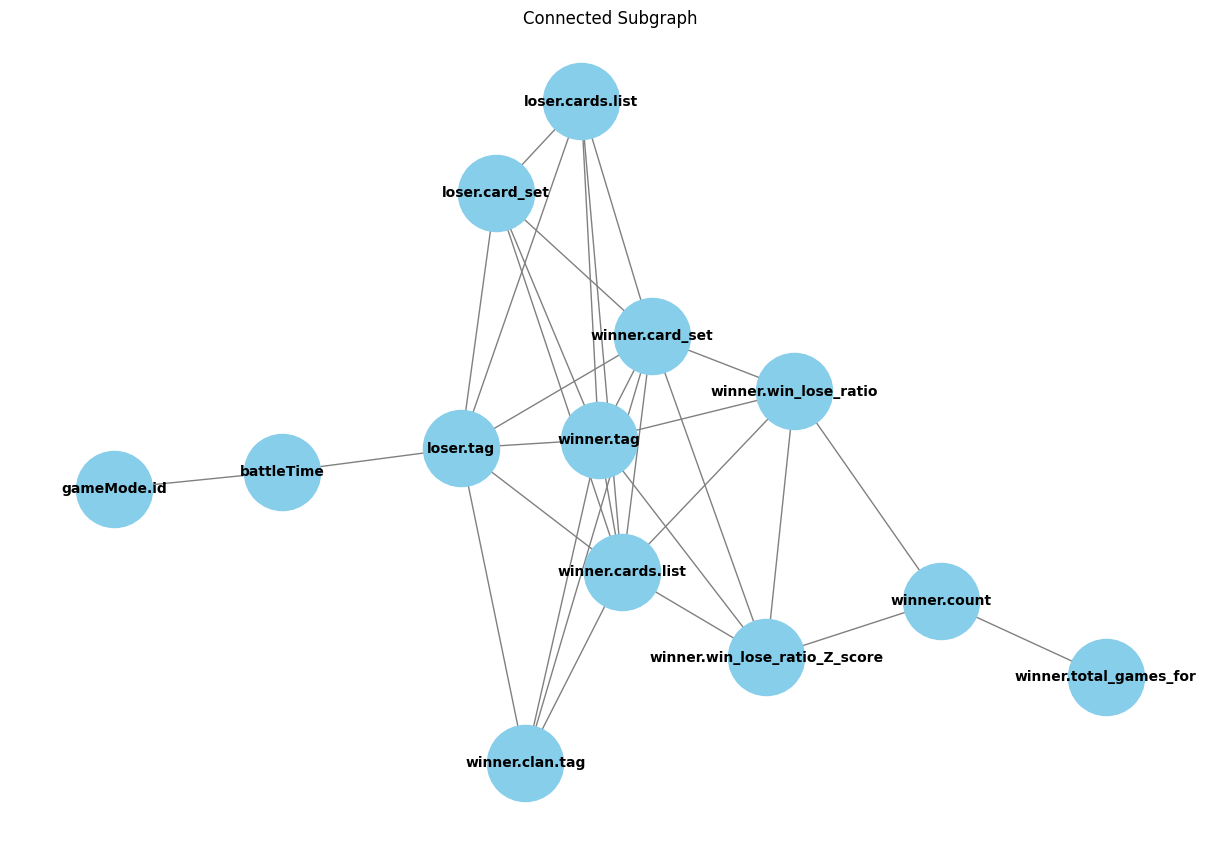

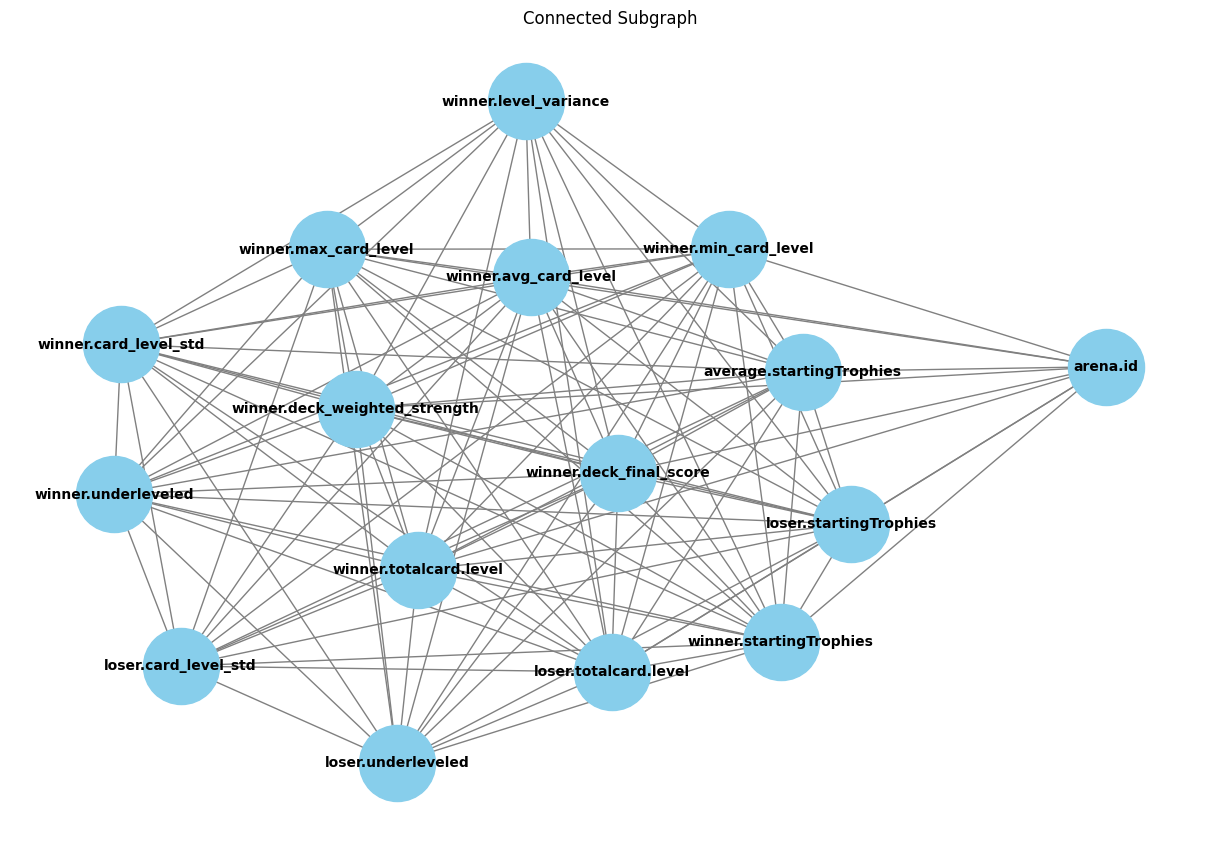

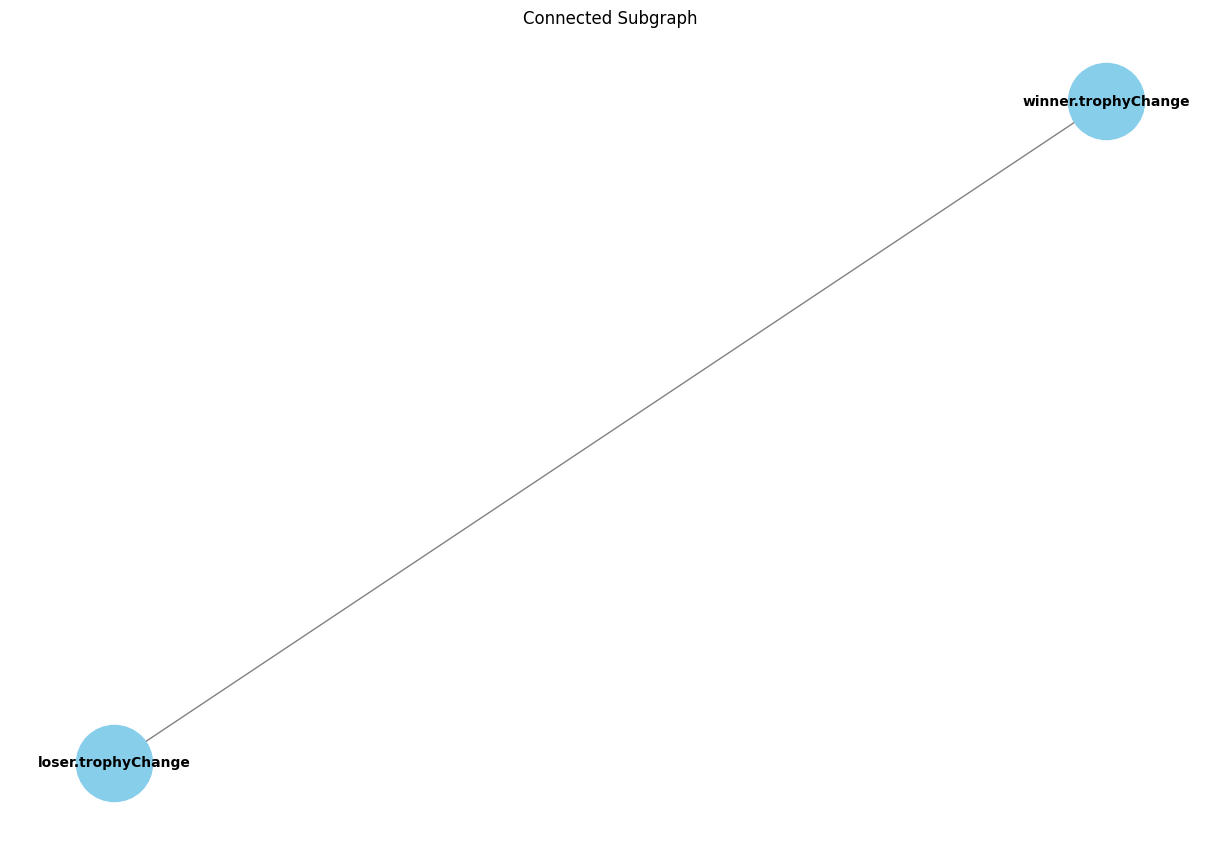

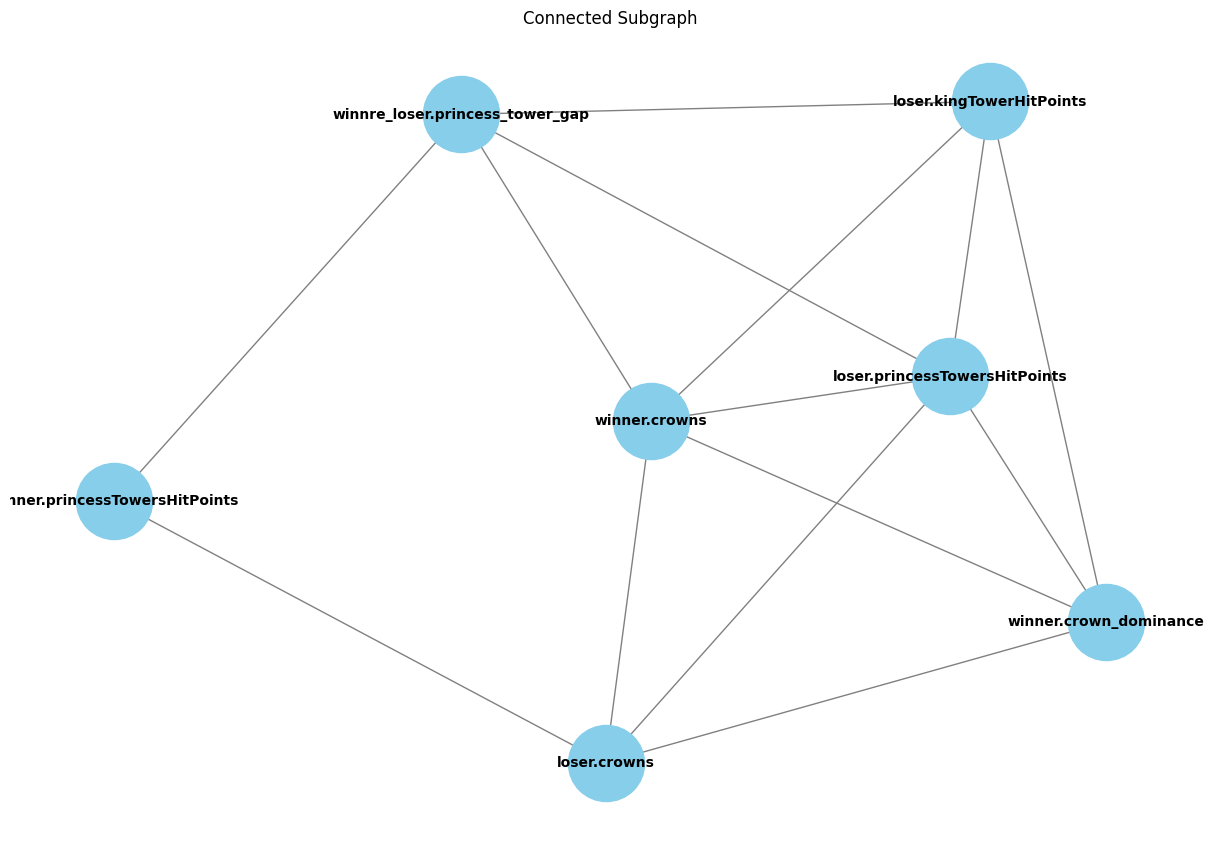

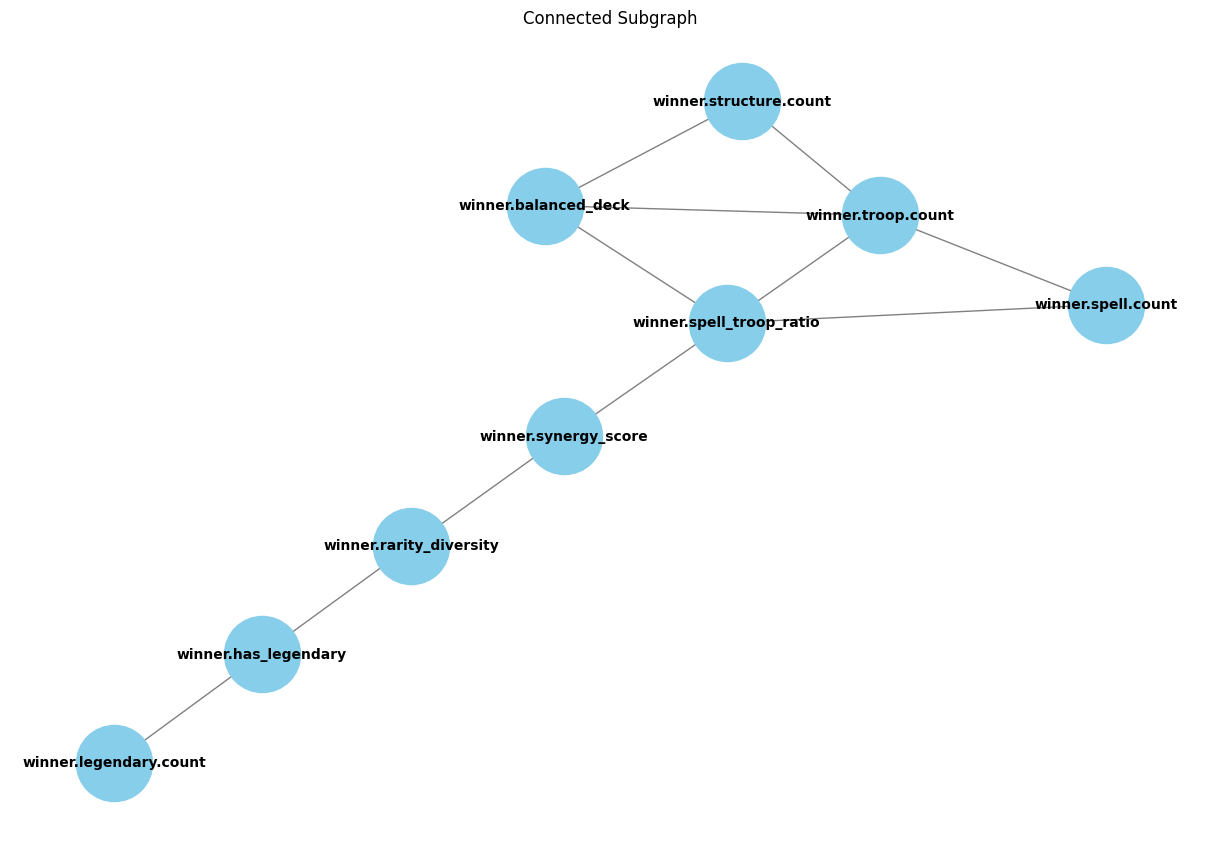

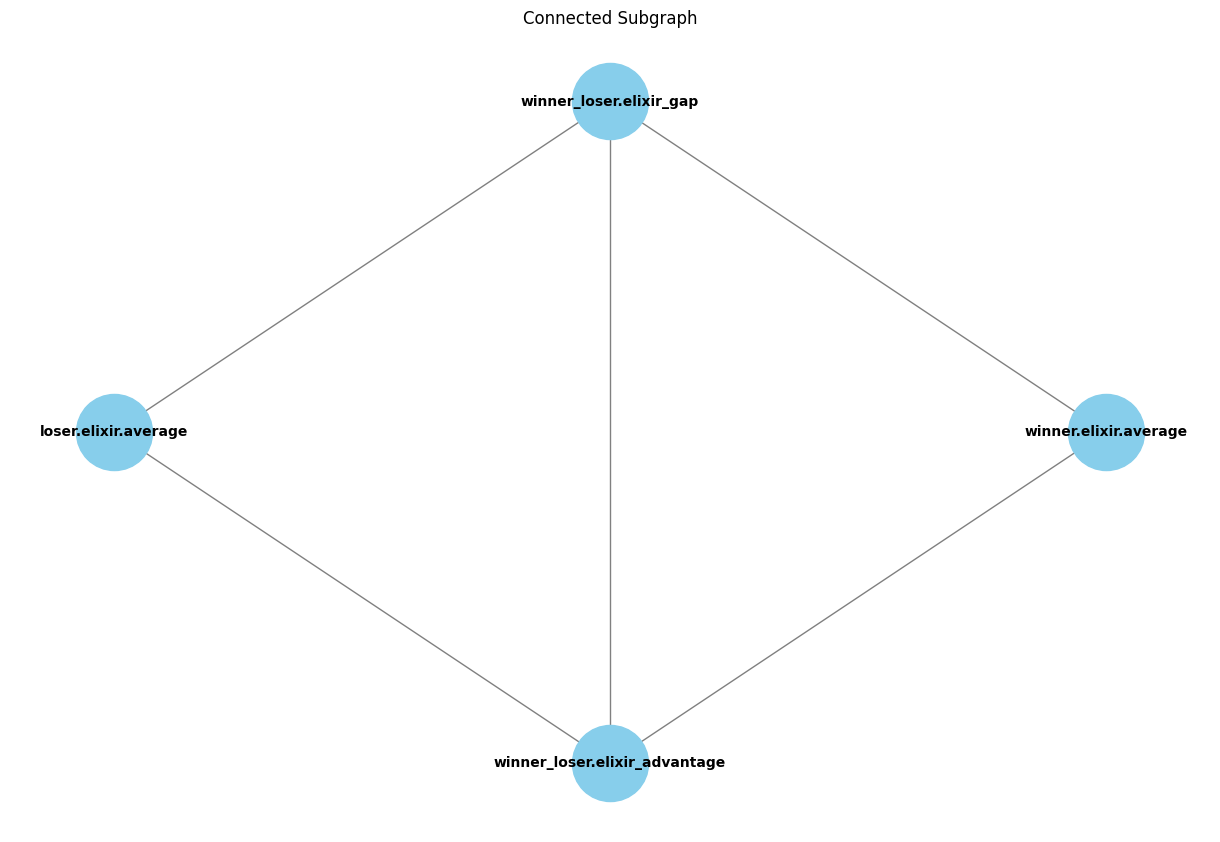

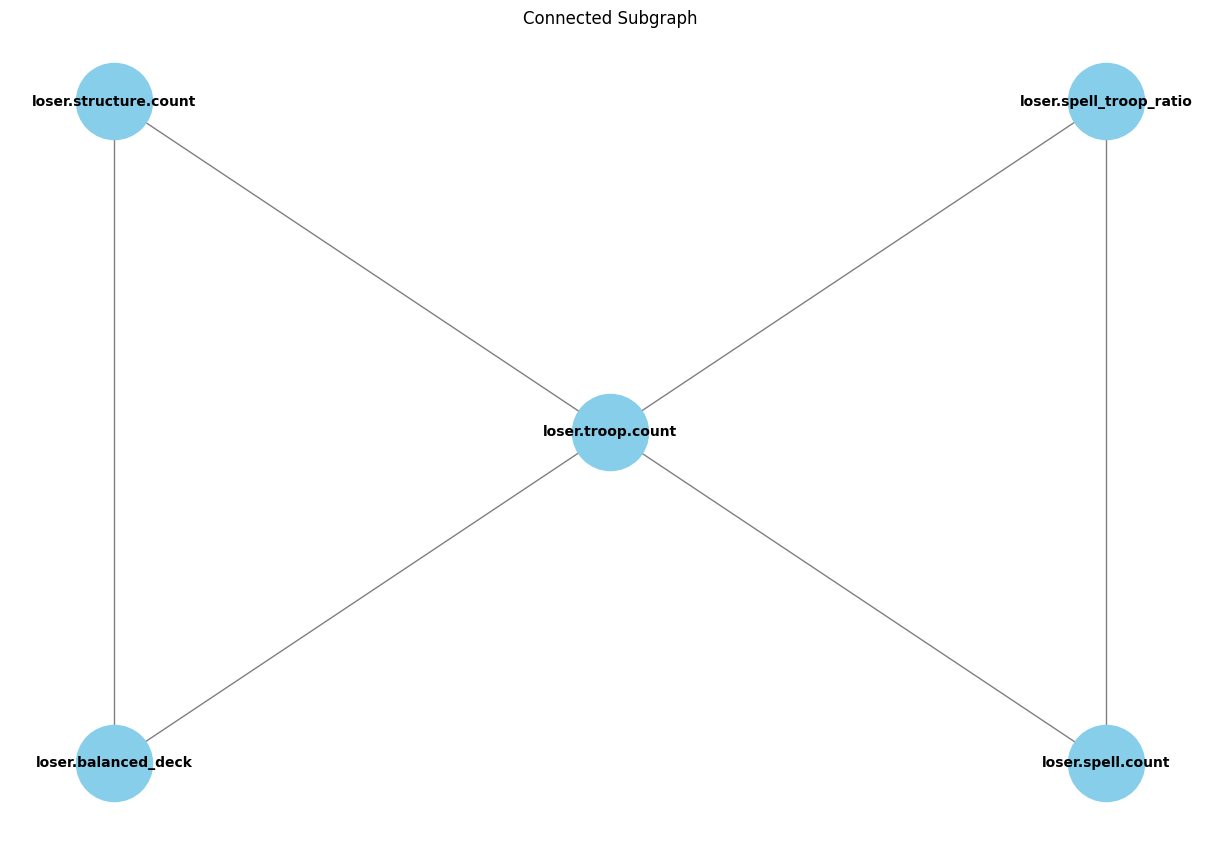

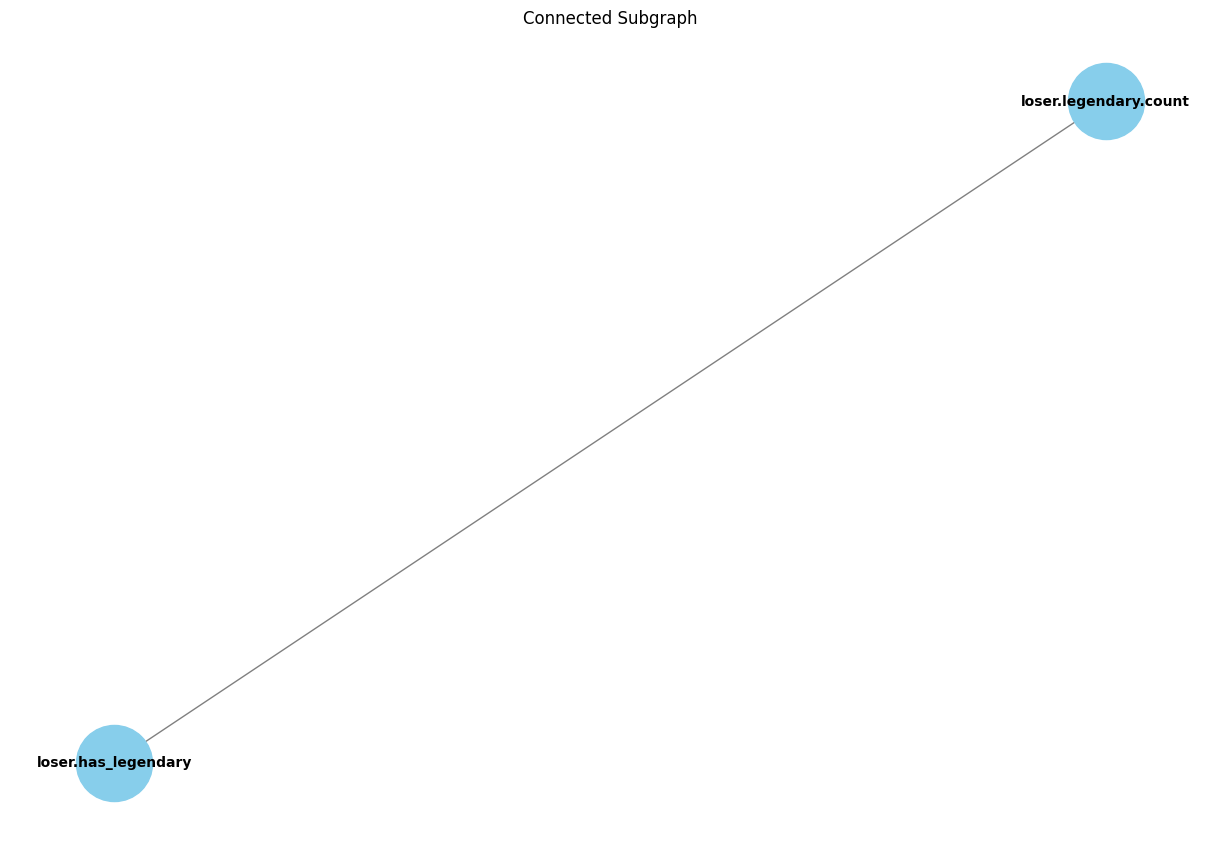

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create an undirected graph
G = nx.Graph()

# Define correlation matrix (example)
np.random.seed(42)

# Add edges based on correlation threshold
correlation_threshold = 0.4
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])

# Use Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Draw the undirected graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", 
        font_size=10, font_weight="bold", edge_color="gray")
plt.title("Undirected Graph Based on Correlation Matrix (|corr| >= 0.4)")
plt.show()

# Draw all connected subgraphs separately
for subgraph in nx.connected_components(G):
    subgraph = G.subgraph(subgraph)
    pos = nx.kamada_kawai_layout(subgraph)
    plt.figure(figsize=(12, 8))
    nx.draw(subgraph, pos, with_labels=True, node_size=3000, node_color="skyblue", 
            font_size=10, font_weight="bold", edge_color="gray")
    plt.title("Connected Subgraph")
    plt.show()


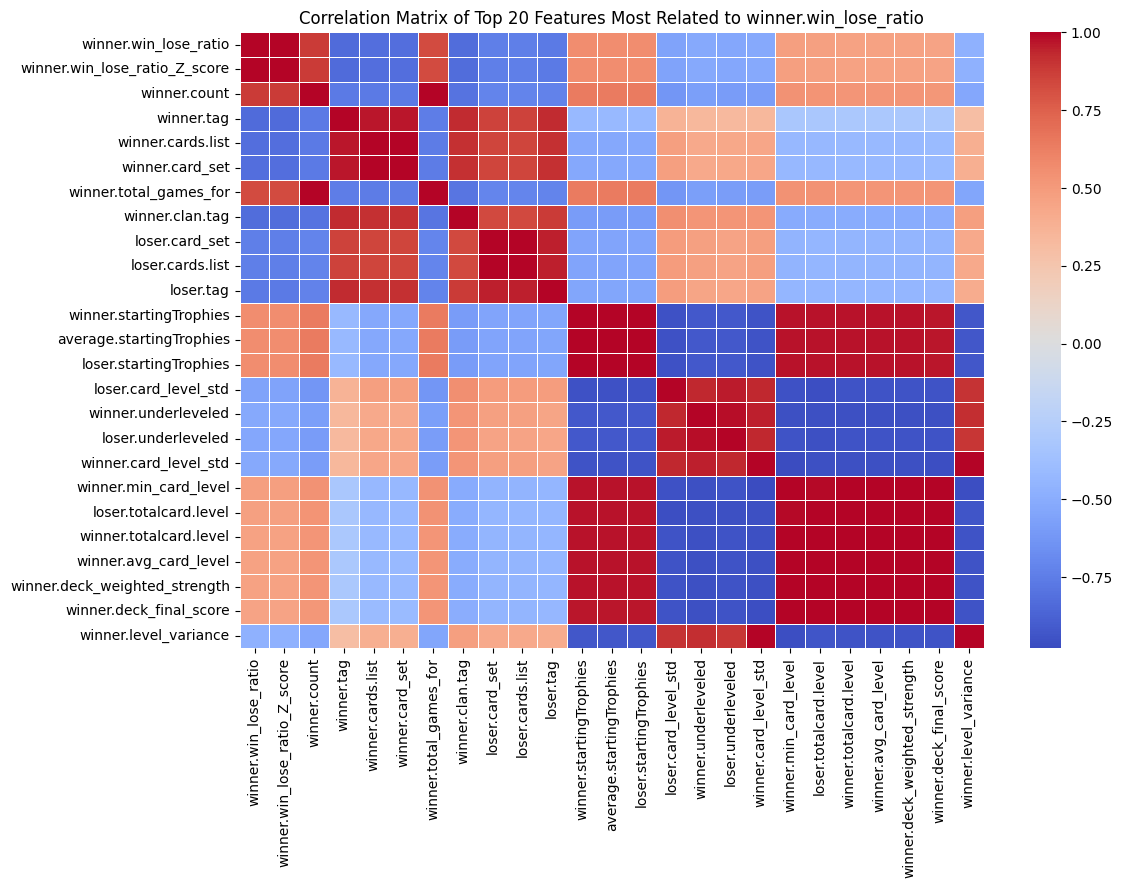

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming corr_matrix is already calculated,
# Example: corr_matrix = battles_df.corr(),
target_col = 'winner.win_lose_ratio'
sorted_corr = correlation_matrix[target_col].abs().sort_values(ascending=False)

plt.figure(figsize=(12, 8)),
sns.heatmap(correlation_matrix[sorted_corr.index[0:25]].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title(f'Correlation Matrix of Top 20 Features Most Related to {target_col}')
plt.show()

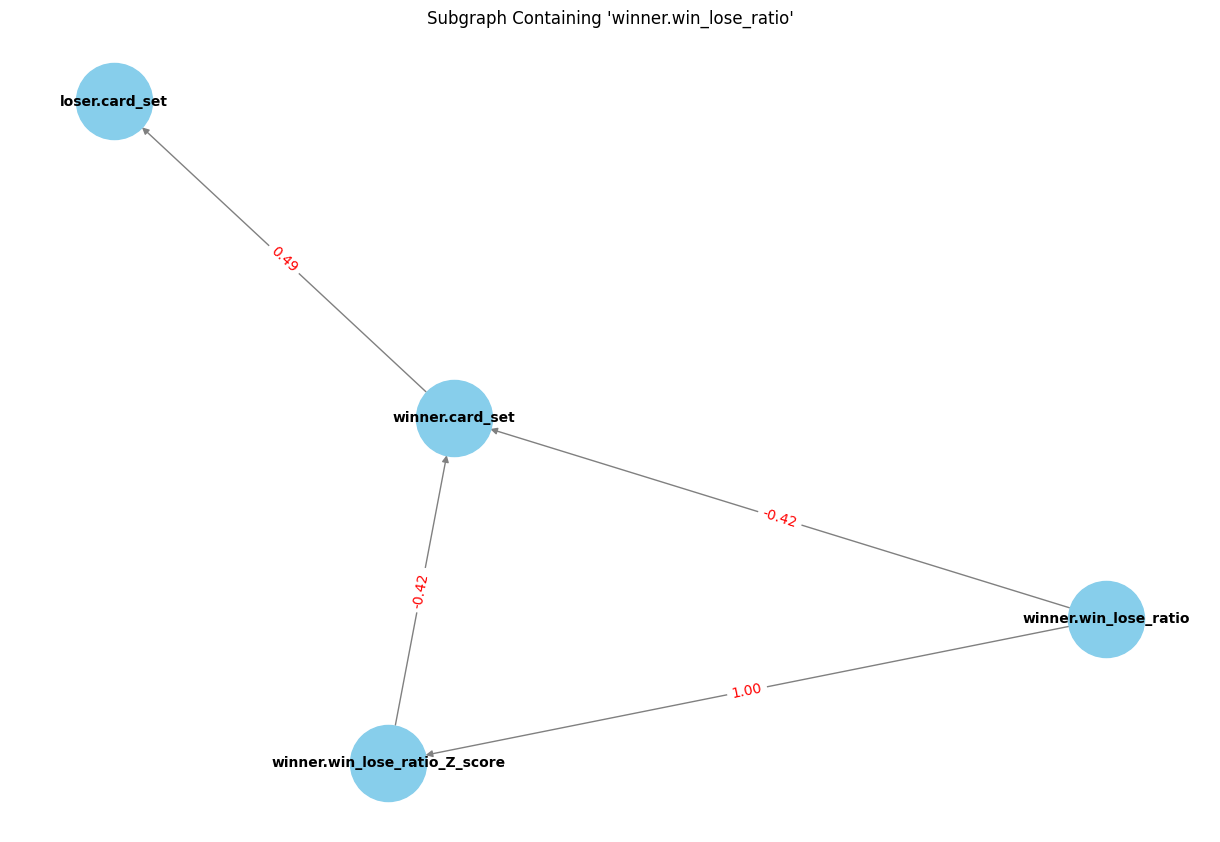

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Define correlation matrix (example)
np.random.seed(42)
# correlation_matrix = pd.DataFrame(np.random.rand(5, 5), columns=list(correlation_matrix.columns), index=list(correlation_matrix.columns))
np.fill_diagonal(correlation_matrix.values, 1)  # Self-correlation is 1

# Add edges based on correlation threshold
correlation_threshold = 0.4
for i in range(len(correlation_matrix.columns)):
	for j in range(i+1, len(correlation_matrix.columns)):
		if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
			G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])

# Extract the subgraph containing the node 'win_lose_ratio'
target_node = 'winner.win_lose_ratio'
subgraph_nodes = set(nx.single_source_shortest_path_length(G, target_node).keys())
subgraph = G.subgraph(subgraph_nodes)

# Use Kamada-Kawai layout
pos = nx.kamada_kawai_layout(subgraph)

# Draw the subgraph with edge labels
plt.figure(figsize=(12, 8))
nx.draw(subgraph, pos, with_labels=True, node_size=3000, node_color="skyblue", 
	font_size=10, font_weight="bold", edge_color="gray")

# Add edge labels
edge_labels = {(i, j): f'{correlation_matrix.loc[i, j]:.2f}' for i, j in subgraph.edges}
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_color='red')

plt.title("Subgraph Containing 'winner.win_lose_ratio'")
plt.show()

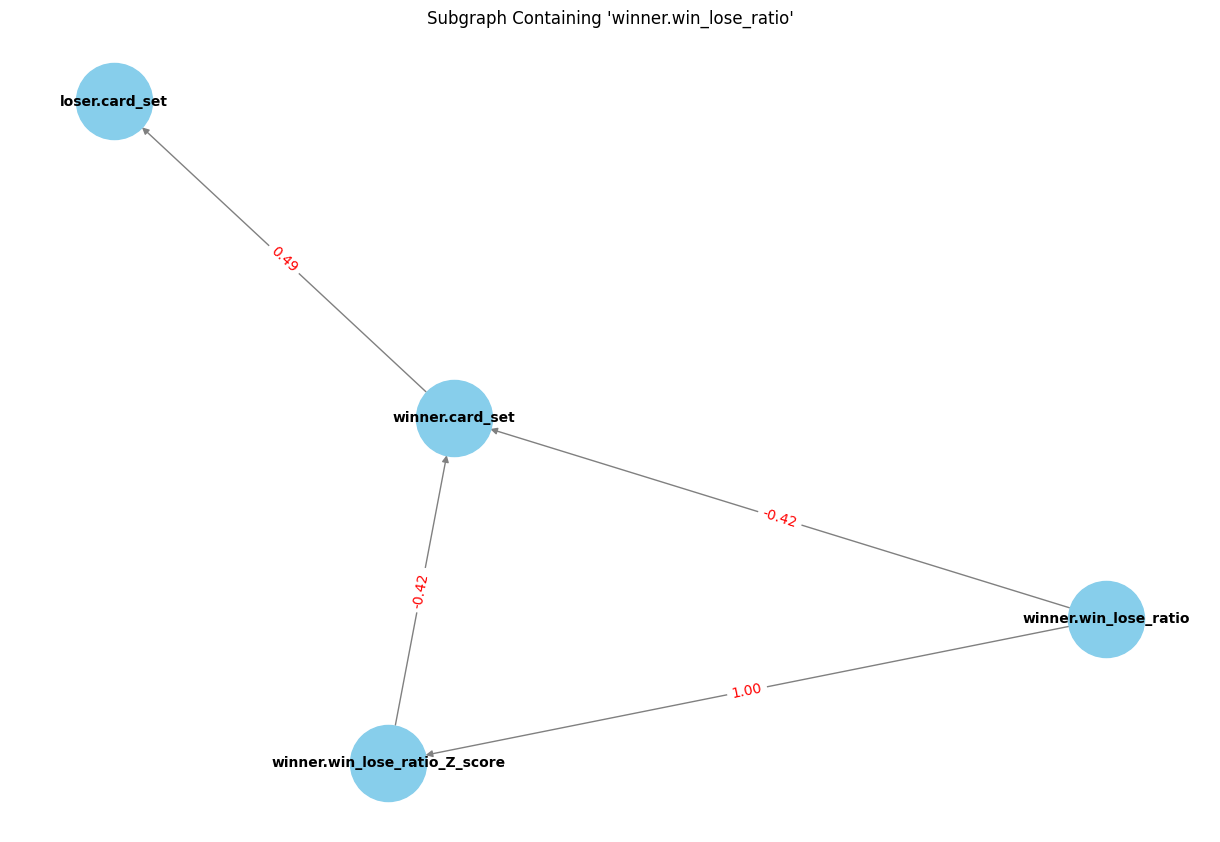

In [48]:
np.fill_diagonal(correlation_matrix.values, 1)  # Self-correlation is 1

# Add edges based on correlation threshold
correlation_threshold = 0.4
for i in range(len(correlation_matrix.columns)):
	for j in range(i+1, len(correlation_matrix.columns)):
		if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
			G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])

# Extract the subgraph containing the node 'win_lose_ratio'
target_node = 'winner.win_lose_ratio'
subgraph_nodes = set(nx.single_source_shortest_path_length(G, target_node).keys())
subgraph = G.subgraph(subgraph_nodes)

# Use Kamada-Kawai layout
pos = nx.kamada_kawai_layout(subgraph)

# Draw the subgraph with edge labels
plt.figure(figsize=(12, 8))
nx.draw(subgraph, pos, with_labels=True, node_size=3000, node_color="skyblue", 
	font_size=10, font_weight="bold", edge_color="gray")

# Add edge labels
edge_labels = {(i, j): f'{correlation_matrix.loc[i, j]:.2f}' for i, j in subgraph.edges}
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_color='red')

plt.title("Subgraph Containing 'winner.win_lose_ratio'")
plt.show()

## PCA and K-Means to find strong connections and special patterns

In this section, we will test our features in the cleaned and prepared dataset.
First, we denote our hureistic as 95% variance (explained in the article).
We run PCA once to find the best n for our problem: 
We want the cumulative variance to be at least 95%, but we want to reduce the dataset from 94 fetures as much as we can.
Then, we run PCA with our optimal value of n

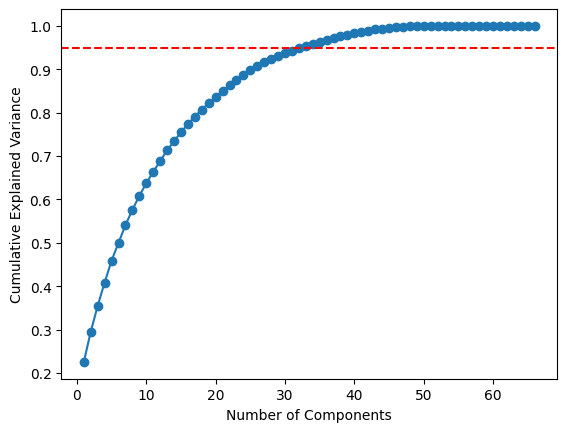

Best component: 33 with a cumulative_variance value of: 0.9541
Explained Variance Ratio: 0.9540688198737766


In [ ]:
filtered_df, n = pc.get_pca_optimal_components(battles_df)  
pca_n = PCA(n_components=n)
pca_for_df = pca_n.fit_transform(filtered_df)
df_pca = pd.DataFrame(pca_for_df, columns=[f"PC{i+1}" for i in range(n)])
print("Explained Variance Ratio:", pca_n.explained_variance_ratio_.sum())

We can see that n=32 is our optimal value for n components. Although this number reduces significantlly our dataset, it is still high enough to make it hard for interpretability so we run PCA with n=2 in order to gain some intuition of the data:

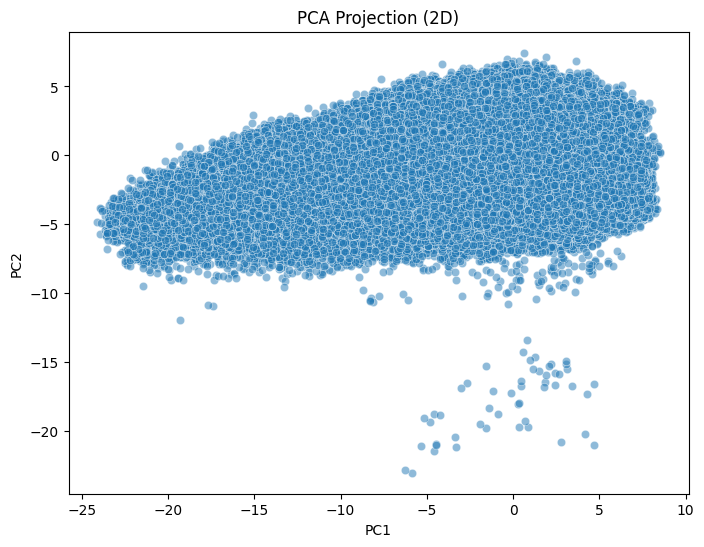

In [ ]:
pca_2d = PCA(n_components=2).fit_transform(filtered_df)
df_pca_2d = pd.DataFrame(pca_2d, columns=["PC1", "PC2"])
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", data=df_pca_2d, alpha=0.5)
plt.title("PCA Projection (2D)")
plt.show()

We can notice the dense region (main cluster), The majority of data points are packed in the upper region, indicating strong correlations within those principal components, but there's also some seperated points which my indicate subgroups or outliers. We will get back to our new dataset but for now we want to focus on the lower region of the plot, and understand if the corresponded points are outliers or unique subgroup/s. We use K_means to check the corresponded points, we checked clusters sized at 1..6 and 4 was the best option to understand the data:

/Users/yagelmaimon/Desktop/technion/nihul_lekabalat_ahlatot/the_project/Clash-Royale-Causal-analysis/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


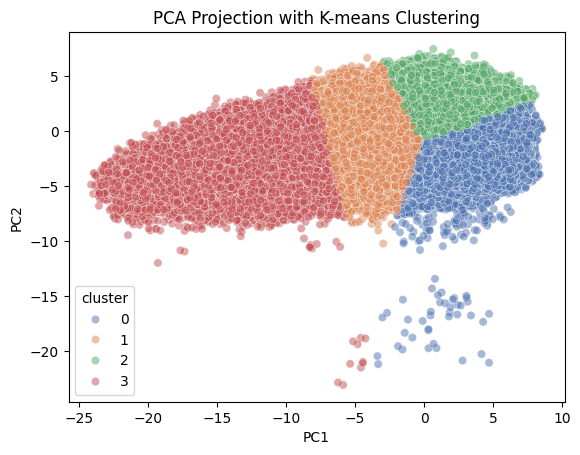

In [ ]:
kmeans = KMeans(n_clusters=4)
df_pca_2d["cluster"] = kmeans.fit_predict(df_pca_2d[["PC1", "PC2"]])
sns.scatterplot(x="PC1", y="PC2", hue=df_pca_2d["cluster"], palette="deep", data=df_pca_2d, alpha=0.5)
plt.title("PCA Projection with K-means Clustering")
plt.show()

As seen, there is a cluster which contains most of the lower region, which may indicate information that we seek (in contrast to outliers). Back to our dataset with n_components = 32, we will check the properties of the dataset as the following:
1. Applying K-Means clustering on full PCA-Reduced Data
2. Detect outliers using isolation forest in full PCA space
3. Identify the cluster with the most outliers
4. Understand the features that most contribute to our subgroup
5. Extract outlier battles from the outlier cluster (Full Feature Data)
6. Examine the outliers, including probabilities and usage

Cluster 1 contains the most outliers.
Top Contributing Features for Outlier Cluster:
                      Feature  Importance
20          winner.epic.count    3.831915
32       loser.elixir.average    3.769733
58   loser.winning_card_count    3.766286
29           loser.rare.count    3.702657
18        winner.common.count    3.694559
37       loser.card_level_std    3.687002
22      winner.elixir.average    3.673232
57  winner.winning_card_count    3.581328
19          winner.rare.count    3.580253
30           loser.epic.count    3.456356


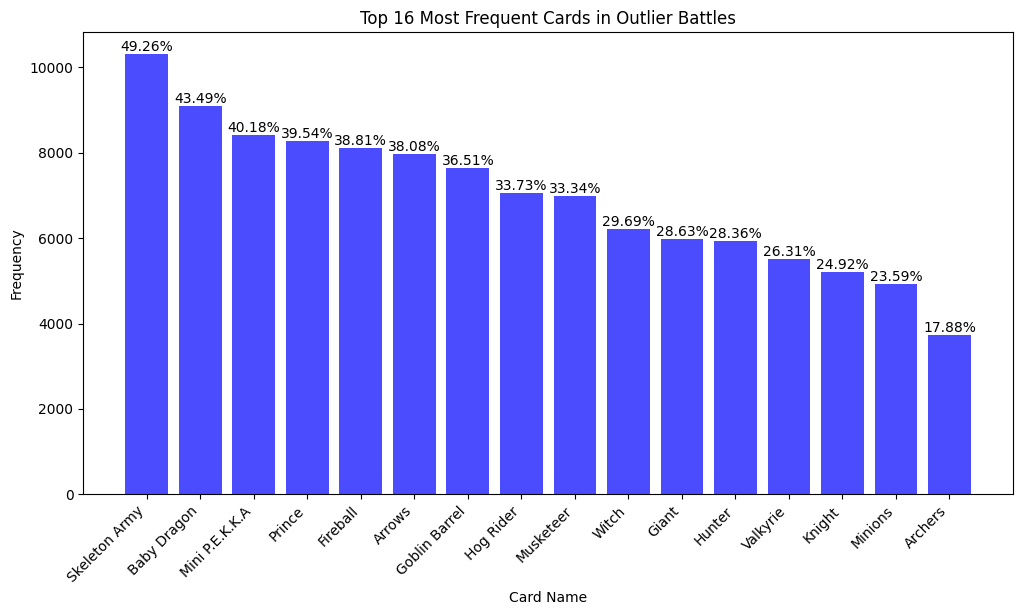

In [ ]:
# Step 1
kmeans = KMeans(n_clusters=4, random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)

# Step 2
outlier_detector = IsolationForest(contamination=0.01, random_state=42)
df_pca["outlier"] = outlier_detector.fit_predict(df_pca.drop(columns=["cluster"]))

# Step 3
outlier_cluster = df_pca[df_pca["outlier"] == -1]["cluster"].value_counts().idxmax()
print(f"Cluster {outlier_cluster} contains the most outliers.")

# Step 4
numerical_dataset = pc.get_numerical_dataset(battles_df)
feature_contributions = np.abs(pca_n.components_).sum(axis=0)  # Sum of absolute contributions of all PCs
feature_importance = pd.DataFrame({"Feature": numerical_dataset.columns, "Importance": feature_contributions})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False).head(10)
print("Top Contributing Features for Outlier Cluster:")
print(feature_importance)

# Step 5
outlier_battle_indices = df_pca.index[(df_pca["outlier"] == -1) & (df_pca["cluster"] == outlier_cluster)]
outlier_battles = numerical_dataset.loc[outlier_battle_indices]
#outlier_battles.to_csv("battles_subset_outliers.csv", index=False)

# Step 6
outlier_battles_full = battles_df[battles_df["Unnamed: 0"].isin(outlier_battles["Unnamed: 0"])].copy()
card_histogram = Counter()
for cards in outlier_battles_full["winner.card_set"]:
    card_histogram.update(cards)
card_hist_df = pd.DataFrame.from_dict(card_histogram, orient='index', columns=['Count']).reset_index()
card_hist_df.columns = ['Card Index', 'Count']
card_hist_df = card_hist_df.merge(card_list_df, left_on='Card Index', right_on='team.card1.id', how='left')
card_hist_df['Card Name'] = card_hist_df['team.card1.name'].fillna('Unknown')
total_outlier_battles = len(outlier_battles_full)
card_hist_df['Probability'] = card_hist_df['Count'] / total_outlier_battles
# Selecting only the top 16 most frequent cards for visualization
card_hist_df = card_hist_df.sort_values(by='Count', ascending=False).head(16)
plt.figure(figsize=(12,6))
bars = plt.bar(card_hist_df['Card Name'], card_hist_df['Count'], color='blue', alpha=0.7)
plt.xlabel("Card Name")
plt.ylabel("Frequency")
plt.title("Top 16 Most Frequent Cards in Outlier Battles")
plt.xticks(rotation=45, ha='right')
for bar, prob in zip(bars, card_hist_df['Probability']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{prob:.2%}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

We can see that some cards which are used by the winner having a high probability of being chosen, let's check the full probability table of the top 16 used cards:

In [ ]:
# Print DataFrame with probabilities
card_hist_df.drop(columns=['Card Index', 'team.card1.id', 'team.card1.name'], inplace=True)
print(card_hist_df)

    Count       Card Name  Probability
9   10307   Skeleton Army     0.492569
10   9101     Baby Dragon     0.434934
29   8407  Mini P.E.K.K.A     0.401768
21   8273          Prince     0.395364
19   8121        Fireball     0.388100
20   7969          Arrows     0.380836
38   7640   Goblin Barrel     0.365114
16   7057       Hog Rider     0.337252
15   6977       Musketeer     0.333429
36   6212           Witch     0.296870
43   5991           Giant     0.286308
17   5934          Hunter     0.283584
1    5505        Valkyrie     0.263082
26   5214          Knight     0.249176
44   4936         Minions     0.235890
64   3741         Archers     0.178781


Feature Importance (Whole PCA Dataset):
                      Feature  Importance
20          winner.epic.count    3.831915
32       loser.elixir.average    3.769733
58   loser.winning_card_count    3.766286
29           loser.rare.count    3.702657
18        winner.common.count    3.694559
37       loser.card_level_std    3.687002
22      winner.elixir.average    3.673232
57  winner.winning_card_count    3.581328
19          winner.rare.count    3.580253
30           loser.epic.count    3.456356
Feature Importance (Cluster-Specific PCA):
                     Feature  Importance
39   loser.spell_troop_ratio    3.344315
28        loser.common.count    3.204725
20         winner.epic.count    3.043071
1                   arena.id    3.024076
18       winner.common.count    2.897791
58  loser.winning_card_count    2.831620
37      loser.card_level_std    2.826649
41   winner.rarity_diversity    2.725665
30          loser.epic.count    2.718674
40   winner_loser.elixir_gap    2.697589


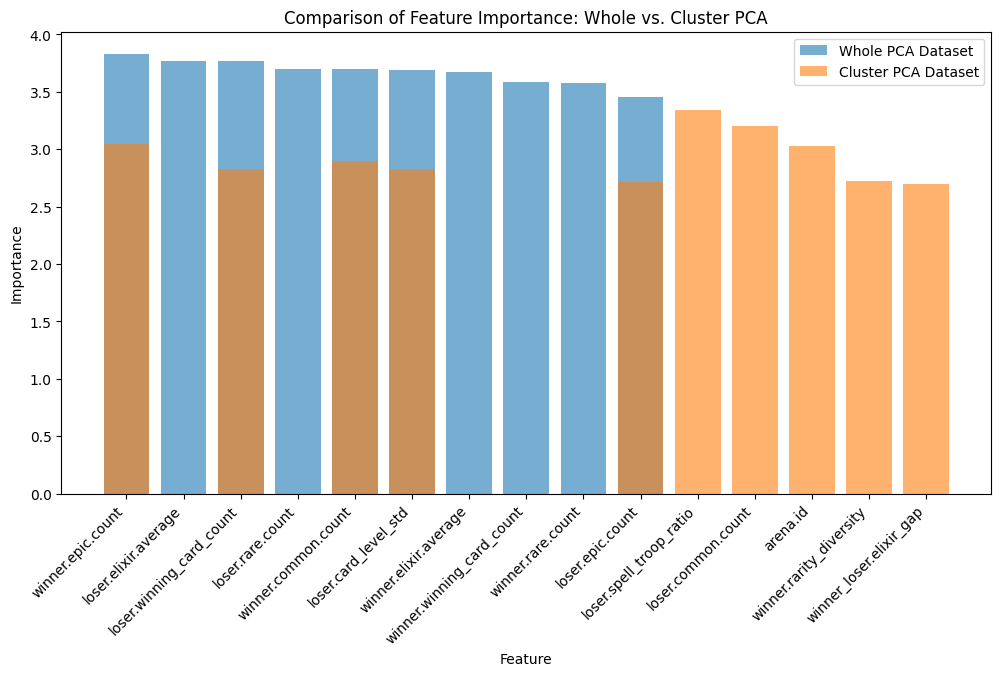

In [ ]:
feature_contributions_whole = np.abs(pca_n.components_).sum(axis=0)
feature_importance_whole = pd.DataFrame({
    "Feature": numerical_dataset.columns,
    "Importance": feature_contributions_whole
}).sort_values(by="Importance", ascending=False)
print("Feature Importance (Whole PCA Dataset):")
print(feature_importance_whole.head(10))

cluster_pca = PCA(n_components=n)
df_pca_cluster = cluster_pca.fit_transform(numerical_dataset.loc[outlier_battle_indices])

feature_contributions_cluster = np.abs(cluster_pca.components_).sum(axis=0)
feature_importance_cluster = pd.DataFrame({
    "Feature": numerical_dataset.columns,
    "Importance": feature_contributions_cluster
}).sort_values(by="Importance", ascending=False)

print("Feature Importance (Cluster-Specific PCA):")
print(feature_importance_cluster.head(10))

plt.figure(figsize=(12,6))
plt.bar(feature_importance_whole["Feature"][:10], feature_importance_whole["Importance"][:10], alpha=0.6, label="Whole PCA Dataset")
plt.bar(feature_importance_cluster["Feature"][:10], feature_importance_cluster["Importance"][:10], alpha=0.6, label="Cluster PCA Dataset")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.title("Comparison of Feature Importance: Whole vs. Cluster PCA")
plt.legend()
plt.show()


Conclusion: we noticed some intresting facts: only 3 spells are used in the top 16 cards which construct the winner's deck, and 9 cards have a probability of more than 30% being choosed, while uniformaly speaking a card has a chance of ~5% probability of being choosed. We will prioritize the cards in the given table when checking for deck constructions.

### TODO: SALEH: ADD GRAPH AS SAID
### TODO: YAGEL AND RONI: add DAG per target features
### TODO: YAGEL: UNDERSTAND WHAT TO DO WITH DAG
### TODO: YAGEL: maintain the feature names.
### DATELINE: 18/02 18:00


### SALEH:
- 2.1 Data Acquisition and 2.1.1 Data Structure in the article, add a graph for 2.1.1
- Check how to insert MVD usage in code/article
- 2.4.4 Causal Model

### YAGEL:
- 2.2 Exploratory Data Analysis in the article
- continue with DAG aftermeth
- 2.4.4 Causal Model

### RONI:
- 2.3.1 imputation
- t-SNE

## DATELINE: 21/02 15:00